In [1]:
!pip install tiingo

In [2]:
# from config import API_KEY
API_KEY = 'e572e848ea6815b9a406e29401951beadd20c949'
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
# import sweetviz as sv
import plotly.express as px


Obtaining Data

In [3]:
# Data Collection

from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2004-02-26 00:00:00+00:00,26.50,26.65,26.41,26.63,66602700,16.577105,16.670938,16.520805,16.658427,66602700,0.0,1.0
2004-02-27 00:00:00+00:00,26.53,26.62,26.35,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,0.0,1.0
2004-03-01 00:00:00+00:00,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.0,1.0
2004-03-02 00:00:00+00:00,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.0,1.0
2004-03-03 00:00:00+00:00,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.0,1.0


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2004-02-26,26.50,26.650,26.41,26.63,66602700,16.577105,16.670938,16.520805,16.658427,66602700,0.00,1.0
1,2004-02-27,26.53,26.620,26.35,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,0.00,1.0
2,2004-03-01,26.70,26.720,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.00,1.0
3,2004-03-02,26.39,26.690,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.00,1.0
4,2004-03-03,26.37,26.550,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-13,406.32,410.071,403.39,404.94,27824936,405.577167,409.321309,402.652523,404.199689,27824936,0.00,1.0
5026,2024-02-14,409.49,409.840,404.57,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190,0.75,1.0
5027,2024-02-15,406.56,409.130,404.29,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,0.00,1.0
5028,2024-02-16,404.06,408.290,403.44,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.00,1.0


Exploratory Analysis

In [5]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(df)
# # report.show_notebook()
# report.show_html('report.html', open_browser=False)

Removing Columns

In [6]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low'], axis = 1)
# See results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-26,26.63,66602700,16.577105,16.670938,16.520805,16.658427,66602700
1,2004-02-27,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500
2,2004-03-01,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300
3,2004-03-02,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000
4,2004-03-03,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700
...,...,...,...,...,...,...,...,...
5025,2024-02-13,404.94,27824936,405.577167,409.321309,402.652523,404.199689,27824936
5026,2024-02-14,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190
5027,2024-02-15,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525
5028,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495


Plotting a Candlestick Chart

In [7]:
# # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
df_predict = df.tail(506)
# See results
df_predict

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
4524,2022-02-14,293.770,36359487,289.129122,290.854096,285.551762,287.923600,36359487
4525,2022-02-15,300.008,27379488,294.490262,294.813694,291.108921,294.037456,27379488
4526,2022-02-16,298.365,29982121,294.147227,295.492742,288.431244,293.032512,29982121
4527,2022-02-17,296.360,32461580,285.533968,291.495483,284.817015,291.063347,32461580
4528,2022-02-18,293.050,34264008,282.784011,288.608027,281.188053,287.812504,34264008
...,...,...,...,...,...,...,...,...
5025,2024-02-13,404.940,27824936,405.577167,409.321309,402.652523,404.199689,27824936
5026,2024-02-14,408.070,20401190,409.490000,409.840000,404.570000,408.070000,20401190
5027,2024-02-15,408.140,21825525,406.560000,409.130000,404.290000,408.140000,21825525
5028,2024-02-16,407.960,22296495,404.060000,408.290000,403.440000,407.960000,22296495


In [8]:
# # Removing last 2 years from the original dataframe
df.drop(df_predict.index,inplace = True)
# See results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-26,26.630,66602700,16.577105,16.670938,16.520805,16.658427,66602700
1,2004-02-27,26.480,58266500,16.595872,16.652171,16.483272,16.564594,58266500
2,2004-03-01,26.650,51912300,16.702215,16.714726,16.577105,16.670938,51912300
3,2004-03-02,26.630,66331000,16.508294,16.695960,16.483272,16.658427,66331000
4,2004-03-03,26.350,54998700,16.495783,16.608383,16.401951,16.483272,54998700
...,...,...,...,...,...,...,...,...
4519,2022-02-07,306.170,28533286,294.960709,301.713589,293.931606,300.076825,28533286
4520,2022-02-08,301.250,32421188,298.498866,299.479944,293.980611,295.254739,32421188
4521,2022-02-09,309.865,31284671,305.016522,305.722193,301.272545,303.698289,31284671
4522,2022-02-10,304.040,45386199,296.362250,302.968116,294.715685,297.989214,45386199


In [9]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-26,26.630,66602700,16.577105,16.670938,16.520805,16.658427,66602700
1,2004-02-27,26.480,58266500,16.595872,16.652171,16.483272,16.564594,58266500
2,2004-03-01,26.650,51912300,16.702215,16.714726,16.577105,16.670938,51912300
3,2004-03-02,26.630,66331000,16.508294,16.695960,16.483272,16.658427,66331000
4,2004-03-03,26.350,54998700,16.495783,16.608383,16.401951,16.483272,54998700
...,...,...,...,...,...,...,...,...
4519,2022-02-07,306.170,28533286,294.960709,301.713589,293.931606,300.076825,28533286
4520,2022-02-08,301.250,32421188,298.498866,299.479944,293.980611,295.254739,32421188
4521,2022-02-09,309.865,31284671,305.016522,305.722193,301.272545,303.698289,31284671
4522,2022-02-10,304.040,45386199,296.362250,302.968116,294.715685,297.989214,45386199


<Axes: >

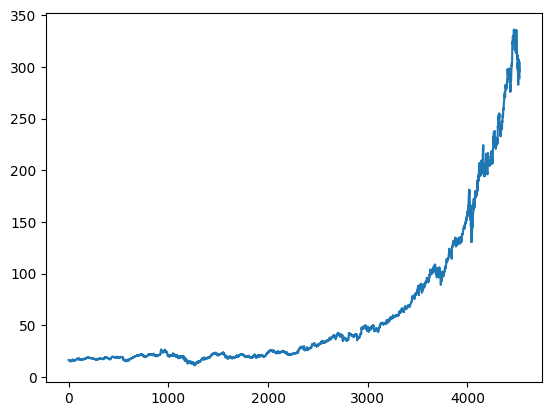

In [10]:
df.adjClose.plot()

In [11]:
diffs= df.diff()

<Axes: >

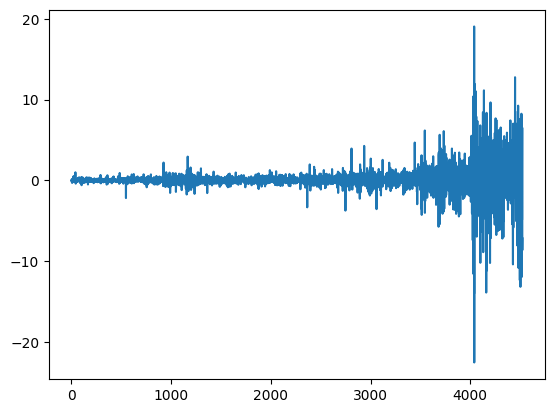

In [12]:
diffs.adjClose.plot()

In [13]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(diffs)
# report.show_notebook()
# report.show_html('report.html', open_browser=False)

In [14]:
diffs.corr()

<ipython-input-14-8b7d8e9dfc8f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
open,1.000000,0.004500,0.286007,0.731458,0.677168,0.998122,0.004500
volume,0.004500,1.000000,-0.034887,0.048326,-0.087951,0.002879,1.000000
adjClose,0.286007,-0.034887,1.000000,0.666974,0.679635,0.285850,-0.034887
adjHigh,0.731458,0.048326,0.666974,1.000000,0.736527,0.732517,0.048326
adjLow,0.677168,-0.087951,0.679635,0.736527,1.000000,0.678091,-0.087951
adjOpen,0.998122,0.002879,0.285850,0.732517,0.678091,1.000000,0.002879
adjVolume,0.004500,1.000000,-0.034887,0.048326,-0.087951,0.002879,1.000000


In [15]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 16):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [16]:
diffs.head(10)

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1 day, 0:00:00",-0.15,-8336200.0,0.018767,-0.018767,-0.037533,-0.093833,-8336200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3 days, 0:00:00",0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,0.018767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1 day, 0:00:00",-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,0.106344,0.018767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1 day, 0:00:00",-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,0.106344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"1 day, 0:00:00",0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1 day, 0:00:00",-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,0.000000,-0.012511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"3 days, 0:00:00",0.08,9518000.0,-0.325287,-0.156388,-0.243965,0.050044,9518000.0,-0.012511,0.000000,...,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"1 day, 0:00:00",-0.54,11743900.0,-0.068811,-0.237709,-0.168899,-0.337798,11743900.0,-0.325287,-0.012511,...,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"1 day, 0:00:00",-0.11,-5955900.0,-0.218943,-0.106344,-0.118855,-0.068811,-5955900.0,-0.068811,-0.325287,...,-0.193921,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
diffs['date'] = df['date']
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,2004-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-02-27,-0.150,-8336200.0,0.018767,-0.018767,-0.037533,-0.093833,-8336200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03-01,0.170,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,0.018767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-03-02,-0.020,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,0.106344,0.018767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-03-03,-0.280,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,0.106344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,2022-02-07,5.960,-6563202.0,-4.890693,-0.940895,-0.068607,5.841388,-6563202.0,4.596663,-11.967005,...,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745,5.292533
4520,2022-02-08,-4.920,3887902.0,3.538156,-2.233645,0.049005,-4.822086,3887902.0,-4.890693,4.596663,...,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745
4521,2022-02-09,8.615,-1136517.0,6.517656,6.242249,7.291934,8.443550,-1136517.0,3.538156,-4.890693,...,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467
4522,2022-02-10,-5.825,14101528.0,-8.654272,-2.754077,-6.556860,-5.709075,14101528.0,6.517656,3.538156,...,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571


In [18]:
diffs = diffs.drop(0)
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
1,2004-02-27,-0.150,-8336200.0,0.018767,-0.018767,-0.037533,-0.093833,-8336200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03-01,0.170,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,0.018767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-03-02,-0.020,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,0.106344,0.018767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-03-03,-0.280,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,0.106344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-03-04,0.020,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,2022-02-07,5.960,-6563202.0,-4.890693,-0.940895,-0.068607,5.841388,-6563202.0,4.596663,-11.967005,...,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745,5.292533
4520,2022-02-08,-4.920,3887902.0,3.538156,-2.233645,0.049005,-4.822086,3887902.0,-4.890693,4.596663,...,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745
4521,2022-02-09,8.615,-1136517.0,6.517656,6.242249,7.291934,8.443550,-1136517.0,3.538156,-4.890693,...,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467
4522,2022-02-10,-5.825,14101528.0,-8.654272,-2.754077,-6.556860,-5.709075,14101528.0,6.517656,3.538156,...,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571


In [19]:
diffs.dropna()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
16,2004-03-19,-0.120,-36949400.0,-0.162643,-0.056300,-0.012511,-0.075066,-36949400.0,-0.150132,-0.031278,...,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344,0.018767
17,2004-03-22,-0.310,41323600.0,-0.081322,-0.062555,-0.344053,-0.193921,41323600.0,-0.162643,-0.150132,...,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344
18,2004-03-23,0.100,-35908900.0,-0.218943,-0.112599,0.062555,0.062555,-35908900.0,-0.081322,-0.162643,...,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
19,2004-03-24,-0.270,5888400.0,0.162643,-0.050044,0.043789,-0.168899,5888400.0,-0.218943,-0.081322,...,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
20,2004-03-25,0.240,-11906800.0,0.487930,0.412864,0.250220,0.150132,-11906800.0,0.162643,-0.218943,...,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,2022-02-07,5.960,-6563202.0,-4.890693,-0.940895,-0.068607,5.841388,-6563202.0,4.596663,-11.967005,...,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745,5.292533
4520,2022-02-08,-4.920,3887902.0,3.538156,-2.233645,0.049005,-4.822086,3887902.0,-4.890693,4.596663,...,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745
4521,2022-02-09,8.615,-1136517.0,6.517656,6.242249,7.291934,8.443550,-1136517.0,3.538156,-4.890693,...,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467
4522,2022-02-10,-5.825,14101528.0,-8.654272,-2.754077,-6.556860,-5.709075,14101528.0,6.517656,3.538156,...,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571


In [20]:
import numpy as np
np.where(diffs.adjClose >=0 ,1,0 )

array([1, 1, 0, ..., 1, 0, 0])

In [21]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
1,2004-02-27,-0.15,-8336200.0,0.018767,-0.018767,-0.037533,-0.093833,-8336200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004-03-01,0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,0.018767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,0.106344,0.018767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,0.106344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [22]:
diffs.columns

Index(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen',
       'adjVolume', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13',
       'lag_14', 'lag_15', 'target'],
      dtype='object')

In [23]:
diffs.drop(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow','adjVolume'],axis=1,inplace=True)
diffs.head()


,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
1,-0.093833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,-0.012511,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-0.175154,-0.193921,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,0.012511,-0.012511,-0.193921,0.106344,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [24]:
diffs.dropna(inplace=True)

In [25]:
diffs.head()

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
16,-0.075066,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344,0.018767,0
17,-0.193921,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344,0
18,0.062555,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0
19,-0.168899,-0.218943,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,1
20,0.150132,0.162643,-0.218943,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,1


In [26]:
diffs.iloc[:,:-1]

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
16,-0.075066,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344,0.018767
17,-0.193921,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0.106344
18,0.062555,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
19,-0.168899,-0.218943,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
20,0.150132,0.162643,-0.218943,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,5.841388,4.596663,-11.967005,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745,5.292533
4520,-4.822086,-4.890693,4.596663,-11.967005,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467,-7.399745
4521,8.443550,3.538156,-4.890693,4.596663,-11.967005,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571,0.666467
4522,-5.709075,6.517656,3.538156,-4.890693,4.596663,-11.967005,4.606464,-2.175819,2.665869,8.252431,3.067709,8.056411,-7.723178,0.333234,-5.459150,-1.695571


In [27]:
# from pycaret.classification import *
# s = setup(diffs ,target='target',session_id=123)

In [28]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [29]:
y = diffs.target.values

X = diffs.iloc[:,:-1].values


In [30]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [42]:
# Create a Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layer with the specified input dimension (16 features)
nn_model.add(tf.keras.layers.Dense(units=7, activation="tanh", input_dim=16))

# Add the hidden layers
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=5, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Add the output layer with sigmoid activation for binary classification
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model (you can adjust the optimizer, loss, and metrics as needed)
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model architecture
nn_model.summary()


# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20, initial_epoch=7)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 119       
                                                                 
 dense_11 (Dense)            (None, 3)                 24        
                                                                 
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 5)                 20        
                                                                 
 dense_14 (Dense)            (None, 3)                 18        
                                                                 
 dense_15 (Dense)            (None, 9)                 36        
                                                                 
 dense_16 (Dense)            (None, 1)                

Use Autotuner

In [33]:
import sklearn as skl
import matplotlib.pyplot as plt

In [34]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=16))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 2)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [35]:
!pip install keras_tuner

In [36]:
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [37]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=65,validation_data=(X_test_scaled,y_test))

In [38]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 3,
 'units_0': 1,
 'units_1': 3,
 'units_2': 3,
 'units_3': 5,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0039'}

In [39]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

36/36 - 1s - loss: 0.6551 - accuracy: 0.6096 - 1s/epoch - 28ms/step
Loss: 0.6551203727722168, Accuracy: 0.6095829606056213
